In [6]:
# import io
# import ijson
# city_name = "Phoenix"
# out_file = "outfile.json"
# f = open(out_file,"w+", encoding="utf-8")
# with open("./yelp_dataset/business.json", encoding="UTF-8") as json_file:
#     cursor = 0
#     for line_number, line in enumerate(json_file):
#         line_as_file = io.StringIO(line)
#         json_parser = ijson.parse(line_as_file)
#         for prefix, type, value in json_parser:
#             if(prefix == 'city' and value == city_name):
#                 f.write(line)
#             #print ("prefix=",prefix, "type=",type, "value=",value)
#         cursor += len(line)
# f.close()

In [2]:
import io
import ijson
phoenix_business_ids_dict = {}
with open("./yelp_dataset/Phoenix_business.json", encoding="UTF-8") as json_file:
    for line_number, line in enumerate(json_file):
        line_as_file = io.StringIO(line)
        json_parser = ijson.parse(line_as_file)
        for prefix, type, value in json_parser:
            if(prefix == 'business_id'):
                phoenix_business_ids_dict.update({value: 1})

In [2]:
# out_file = "./yelp_dataset/pheonix_review.json"
# f = open(out_file,"w+", encoding="utf-8")
# with open("./yelp_dataset/review.json", encoding="UTF-8") as json_file:
#     for line_number, line in enumerate(json_file):
#         line_as_file = io.StringIO(line)
#         json_parser = ijson.parse(line_as_file)
#         for prefix, type, value in json_parser:
#             if(prefix == 'business_id' and value in phoenix_business_ids_dict.keys()):
#                 f.write(line)
#                 break
# f.close()

In [17]:
import io
import ijson
phoenix_user_ids_dict = {}
phoenix_business_ids_dict = {}
total_no_of_reviews = 0
with open("./yelp_dataset/Phoenix_reviews.json", encoding="UTF-8") as json_file:
    for line_number, line in enumerate(json_file):
        line_as_file = io.StringIO(line)
        json_parser = ijson.parse(line_as_file)
        total_no_of_reviews += 1
        for prefix, type, value in json_parser:
            if(prefix == 'user_id'):
                if value in phoenix_user_ids_dict.keys():
                    phoenix_user_ids_dict[value] += 1
                else:
                    phoenix_user_ids_dict.update({value: 1})
            elif(prefix == 'business_id'):
                if value in phoenix_business_ids_dict.keys():
                    phoenix_business_ids_dict[value] += 1
                else:
                    phoenix_business_ids_dict.update({value: 1})

In [18]:
total_no_of_reviews

734136

In [8]:
len(phoenix_user_ids_dict)

253152

In [6]:
len(phoenix_business_ids_dict)

18766

In [20]:
min(phoenix_business_ids_dict.values()), max(phoenix_business_ids_dict.values())

(3, 2662)

In [49]:
min(phoenix_user_ids_dict.values()), max(phoenix_user_ids_dict.values())

(1, 721)

In [21]:
len(set(phoenix_business_ids_dict.values()))

580

In [22]:
len(set(phoenix_user_ids_dict.values()))

237

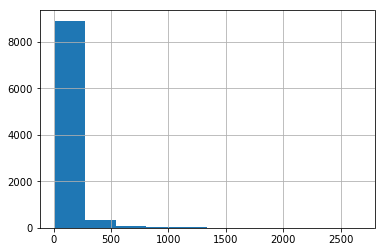

In [47]:
import pandas as pd
import numpy as np
import matplotlib
d = [ele for ele in list(phoenix_business_ids_dict.values()) if ele > 10]
data = pd.Series(np.array(d))
data.hist(bins = 10)

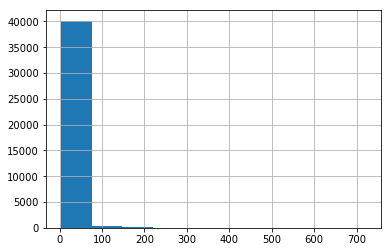

In [55]:
import pandas as pd
import numpy as np
import matplotlib
d = [ele for ele in list(phoenix_user_ids_dict.values()) if ele > 3]
data = pd.Series(np.array(d))
data.hist(bins = 10)

In [57]:
mod_phoenix_user_ids_dict = {}
for key, val in phoenix_user_ids_dict.items():
    if val >= 3:
        mod_phoenix_user_ids_dict[key] = val
len(mod_phoenix_user_ids_dict)

59428

In [58]:
mod_phoenix_business_ids_dict = {}
for key, val in phoenix_business_ids_dict.items():
    if val >= 10:
        mod_phoenix_business_ids_dict[key] = val
len(mod_phoenix_business_ids_dict)

9931

In [65]:
user_cnt = 0
user_id_mapping, rev_user_id_mapping = {}, {}
for key in mod_phoenix_user_ids_dict.keys():
    user_id_mapping[key] = user_cnt
    rev_user_id_mapping[user_cnt] = key
    user_cnt += 1 

In [66]:
restro_cnt = 0
restro_id_mapping, rev_restro_id_mapping = {}, {}
for key in mod_phoenix_business_ids_dict.keys():
    restro_id_mapping[key] = restro_cnt
    rev_restro_id_mapping[restro_cnt] = key
    restro_cnt += 1 

In [67]:
ratings_file = "./yelp_dataset/ratings.txt"
f = open(ratings_file,"w+", encoding="utf-8")
with open("./yelp_dataset/Phoenix_reviews.json", encoding="UTF-8") as json_file:
    for line_number, line in enumerate(json_file):
        line_as_file = io.StringIO(line)
        json_parser = ijson.parse(line_as_file)
        total_no_of_reviews += 1
        user_id = ""
        business_id = ""
        ratings = 0
        for prefix, type, value in json_parser:
            if(prefix == 'user_id'):
                if value in mod_phoenix_user_ids_dict.keys():
                    user_id = value
            elif(prefix == 'business_id'):
                if value in mod_phoenix_business_ids_dict.keys():
                    business_id = value
            elif(prefix == 'stars'):
                    ratings = value
        if len(user_id) != 0 and len(business_id) != 0:
            f.write(str(user_id_mapping[user_id]) + "\t" + str(restro_id_mapping[business_id]) + "\t" + str(ratings) + "\n")                

In [81]:
out_file = "./yelp_dataset/Phoenix_users.json"
f = open(out_file,"w+", encoding="utf-8")
with open("./yelp_dataset/user.json", encoding="UTF-8") as json_file:
    for line_number, line in enumerate(json_file):
        line_as_file = io.StringIO(line)
        json_parser = ijson.parse(line_as_file)
        for prefix, type, value in json_parser:
            if(prefix == 'user_id' and value in mod_phoenix_user_ids_dict.keys()):
                f.write(line)
f.close()

In [100]:
friends_id_dict = {}
with open("./yelp_dataset/Phoenix_users.json", encoding="UTF-8") as json_file:
    for line_number, line in enumerate(json_file):
        line_as_file = io.StringIO(line)
        json_parser = ijson.parse(line_as_file)
        friends = []
        user_id = ""
        for prefix, type, value in json_parser:
            if(prefix == "friends"):
                friend_ids = value.split(",")
                for friend in friend_ids:
                    if friend.strip() in user_id_mapping.keys():
                        friends += [user_id_mapping[friend.strip()]]
            if(prefix == "user_id"):
                user_id = value
        friends_id_dict[user_id_mapping[user_id]] = friends
f.close()

In [119]:
import numpy as np
np.save("friends_dict.npy", friends_id_dict)
np.save("business_id_dict.npy", restro_id_mapping)
np.save("users_id_dict.npy", user_id_mapping)
np.save("rev_business_id_dict.npy", rev_restro_id_mapping)
np.save("rev_users_id_dict.npy", rev_user_id_mapping)
np.save("business_review_count_dict.npy", mod_phoenix_business_ids_dict)
np.save("users_review_count_dict.npy", mod_phoenix_user_ids_dict)